<a href="https://colab.research.google.com/github/namansinghal07/Machine-learning/blob/master/Musk_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
mydata = pd.read_csv('musk_csv.xls')
mydata.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [116]:
from google.colab import files
uploaded = files.upload()

# New Section

In [117]:
mydata.shape

(6598, 170)

In [118]:
mydata.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,...,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,...,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,...,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,3

In [119]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [120]:
mydata['molecule_name'].describe()

count              6598
unique              102
top       NON-MUSK-j146
freq               1044
Name: molecule_name, dtype: object

In [121]:
mydata['molecule_name'].unique()

array(['MUSK-211', 'MUSK-212', 'MUSK-213', 'MUSK-214', 'MUSK-215',
       'MUSK-217', 'MUSK-219', 'MUSK-224', 'MUSK-228', 'MUSK-238',
       'MUSK-240', 'MUSK-256', 'MUSK-273', 'MUSK-284', 'MUSK-287',
       'MUSK-294', 'MUSK-300', 'MUSK-306', 'MUSK-314', 'MUSK-321',
       'MUSK-322', 'MUSK-323', 'MUSK-330', 'MUSK-331', 'MUSK-333',
       'MUSK-344', 'MUSK-f152', 'MUSK-f158', 'MUSK-j33', 'MUSK-j51',
       'MUSK-jf15', 'MUSK-jf17', 'MUSK-jf46', 'MUSK-jf47', 'MUSK-jf58',
       'MUSK-jf59', 'MUSK-jf66', 'MUSK-jf67', 'MUSK-jf78', 'NON-MUSK-192',
       'NON-MUSK-197', 'NON-MUSK-199', 'NON-MUSK-200', 'NON-MUSK-207',
       'NON-MUSK-208', 'NON-MUSK-210', 'NON-MUSK-216', 'NON-MUSK-220',
       'NON-MUSK-226', 'NON-MUSK-232', 'NON-MUSK-233', 'NON-MUSK-244',
       'NON-MUSK-249', 'NON-MUSK-251', 'NON-MUSK-252', 'NON-MUSK-253',
       'NON-MUSK-270', 'NON-MUSK-271', 'NON-MUSK-286', 'NON-MUSK-288',
       'NON-MUSK-289', 'NON-MUSK-290', 'NON-MUSK-295', 'NON-MUSK-296',
       'NON-MUSK-297', 

In [122]:
all = ['MUSK-211', 'MUSK-212', 'MUSK-213', 'MUSK-214', 'MUSK-215',
       'MUSK-217', 'MUSK-219', 'MUSK-224', 'MUSK-228', 'MUSK-238',
       'MUSK-240', 'MUSK-256', 'MUSK-273', 'MUSK-284', 'MUSK-287',
       'MUSK-294', 'MUSK-300', 'MUSK-306', 'MUSK-314', 'MUSK-321',
       'MUSK-322', 'MUSK-323', 'MUSK-330', 'MUSK-331', 'MUSK-333',
       'MUSK-344', 'MUSK-f152', 'MUSK-f158', 'MUSK-j33', 'MUSK-j51',
       'MUSK-jf15', 'MUSK-jf17', 'MUSK-jf46', 'MUSK-jf47', 'MUSK-jf58',
       'MUSK-jf59', 'MUSK-jf66', 'MUSK-jf67', 'MUSK-jf78', 'NON-MUSK-192',
       'NON-MUSK-197', 'NON-MUSK-199', 'NON-MUSK-200', 'NON-MUSK-207',
       'NON-MUSK-208', 'NON-MUSK-210', 'NON-MUSK-216', 'NON-MUSK-220',
       'NON-MUSK-226', 'NON-MUSK-232', 'NON-MUSK-233', 'NON-MUSK-244',
       'NON-MUSK-249', 'NON-MUSK-251', 'NON-MUSK-252', 'NON-MUSK-253',
       'NON-MUSK-270', 'NON-MUSK-271', 'NON-MUSK-286', 'NON-MUSK-288',
       'NON-MUSK-289', 'NON-MUSK-290', 'NON-MUSK-295', 'NON-MUSK-296',
       'NON-MUSK-297', 'NON-MUSK-305', 'NON-MUSK-308', 'NON-MUSK-309',
       'NON-MUSK-318', 'NON-MUSK-319', 'NON-MUSK-320', 'NON-MUSK-326',
       'NON-MUSK-327', 'NON-MUSK-328', 'NON-MUSK-332', 'NON-MUSK-334',
       'NON-MUSK-338', 'NON-MUSK-358', 'NON-MUSK-360', 'NON-MUSK-361',
       'NON-MUSK-362', 'NON-MUSK-f146', 'NON-MUSK-f150', 'NON-MUSK-f161',
       'NON-MUSK-f164', 'NON-MUSK-f209', 'NON-MUSK-j100', 'NON-MUSK-j129',
       'NON-MUSK-j130', 'NON-MUSK-j146', 'NON-MUSK-j147', 'NON-MUSK-j148',
       'NON-MUSK-j81', 'NON-MUSK-j83', 'NON-MUSK-j84', 'NON-MUSK-j90',
       'NON-MUSK-j96', 'NON-MUSK-j97', 'NON-MUSK-jf18', 'NON-MUSK-jf79',
       'NON-MUSK-jp10', 'NON-MUSK-jp13']

In [123]:
musk = []
nonmusk = []
for i in all:
  if i[0] == 'M':
    musk.append(i)
  else:
    nonmusk.append(i)
len(musk), len(nonmusk)

(39, 63)

In [124]:
mydata['muskiness'] = [1 if x in musk else 0 for x in mydata['molecule_name']]
mydata['muskiness'].describe()                    

count    6598.000000
mean        0.154138
std         0.361108
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: muskiness, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


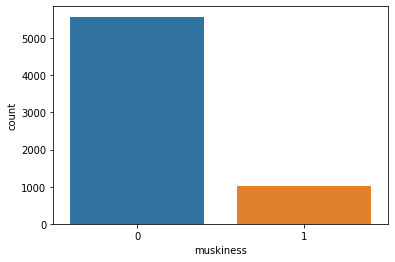

In [125]:
sns.countplot(mydata['muskiness'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


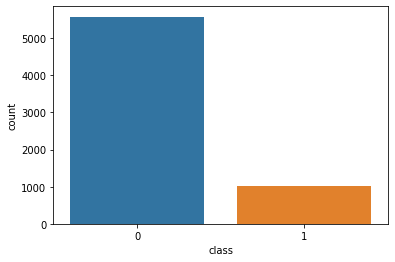

In [126]:
sns.countplot(mydata['class'])


In [127]:
a = sum(mydata['muskiness']!=mydata['class'])
a

0

In [128]:
mydata2 = mydata.drop(['ID',	'molecule_name',	'conformation_name'], axis = 1)
mydata2.head(50)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class,muskiness
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1,1
5,46,-194,-145,28,-117,72,57,-168,-39,-22,-319,-112,-104,-284,-283,-304,52,-153,-97,-225,-28,-22,3,180,49,-33,47,-88,21,79,-116,18,-11,5,-38,72,-175,3,-129,38,...,-1,-24,-14,-129,-74,-126,-222,-93,53,-72,-18,-33,-26,4,49,17,-177,-101,-119,-65,-80,52,-41,-27,-41,-141,76,-164,-239,-138,-156,56,143,142,164,-67,-145,40,1,1
6,47,-199,-106,28,-117,73,27,-104,-22,-23,-269,-210,-105,-285,-283,-302,-59,-74,-190,-226,-59,-13,-42,178,49,23,-21,-134,22,80,-116,15,-11,6,-37,73,-175,72,-109,69,...,0,-23,-18,-129,-62,-160,-204,-23,46,-118,-3,-32,-94,75,80,62,-177,-102,-120,-37,-109,39,-41,-27,-40,-143,74,-170,-238,-133,-153,55,144,142,165,-68,-145,37,1,1
7,41,-199,-101,22,-117,-6,26,-99,-21,-101,-293,-213,-229,-285,-281,-299,-56,-74,-187,-197,-62,-13,-40,75,49,22,-20,-136,33,95,-116,88,-24,42,-58,61,-171,72,-144,69,...,-21,-31,33,-128,-64,-164,-206,-23,45,-118,-2,-30,-90,76,80,62,-177,-102,-121,-37,-108,39,-41,-34,-32,-62,117,-2,-235,-59,-1,50,100,135,169,-60,-135,81,1,1
8,41,-199,-101,22,-117,-6,26,-100,-21,-101,-293,-213,-229,-285,-281,-299,-55,-74,-187,-196,-62,-13,-40,75,49,22,-20,-136,33,95,-116,88,-24,42,-58,61,-171,72,-144,69,...,-21,-32,33,-128,-64,-164,-206,-23,45,-118,-2,-30,-90,76,80,62,-177,-102,-121,-37,-108,40,-41,-34,-32,-62,117,-2,-235,-59,-1,50,100,135,169,-60,-135,81,1,1
9,47,-199,-106,28,-117,73,27,-104,-22,-23,-269,-210,-105,-285,-283,-302,-59,-74,-190,-226,-60,-13,-42,178,49,23,-21,-134,22,80,-116,15,-11,6,-37,73,-175,72,-109,69,...,0,-23,-18,-129,-62,-160,-204,-23,46,-118,-3,-32,-94,75,79,62,-177,-102,-120,-37,-110,39,-41,-27,-40,-143,74,-170,-238,-133,-153,55,144,142,165,-68,-146,37,1,1


In [129]:
mydata2.drop(['muskiness'],axis=1,inplace=True)

In [130]:
mydata2.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
Target=mydata2['class']

In [133]:
Target

0       1
1       1
2       1
3       1
4       1
       ..
6593    0
6594    0
6595    0
6596    0
6597    0
Name: class, Length: 6598, dtype: int64

In [134]:
mydata2.drop(['class'],axis=1,inplace=True)

In [135]:
mydata2.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,41,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80


In [136]:
scaler=StandardScaler()

In [137]:
scaler.fit(mydata2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [138]:
Scaled_data=scaler.transform(mydata2)

In [139]:
from sklearn.decomposition import PCA

In [140]:
pca=PCA(n_components=8)

In [141]:
pca.fit(Scaled_data)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [142]:
x_pca=pca.transform(Scaled_data)

In [143]:
x_pca.shape

(6598, 8)

In [144]:
pca.components_

array([[ 0.00209029,  0.07861939,  0.11635903, ...,  0.0002656 ,
         0.01314856, -0.00202073],
       [ 0.1059241 , -0.02389742, -0.04519831, ...,  0.06208309,
         0.08341433, -0.02239172],
       [ 0.01121441, -0.13144734, -0.01783781, ..., -0.04566441,
        -0.02193953, -0.17895824],
       ...,
       [ 0.06566457, -0.09254871, -0.06877517, ...,  0.08984375,
         0.11513747,  0.01513956],
       [-0.06385375,  0.03125475,  0.02321654, ..., -0.14988595,
        -0.02505675,  0.08574044],
       [-0.00866924,  0.10277413,  0.0195205 , ...,  0.09455628,
        -0.01511884, -0.15983556]])

In [145]:
df_comp=pd.DataFrame(x_pca)

In [146]:
df_comp

,0,1,2,3,4,5,6,7
0,1.217220,9.430927,-2.062256,-1.184652,0.757183,-0.638683,2.620214,0.358631
1,-3.282384,8.142049,-1.017100,1.234690,1.467636,-2.379901,0.394141,-0.437947
2,-3.404298,7.778997,1.738743,0.958767,0.261534,-1.135130,0.039283,-0.401105
3,-3.286574,8.170463,-0.993367,1.204383,1.458174,-2.351412,0.419094,-0.435257
4,-3.284805,8.172113,-0.991075,1.203380,1.453177,-2.350361,0.422823,-0.431193
...,...,...,...,...,...,...,...,...
6593,9.490173,-0.892529,-1.959916,3.684262,1.166644,0.460978,-2.115250,-1.641617
6594,9.371482,-1.684776,4.103832,2.660009,-0.313289,-0.769688,-1.768343,-0.767951
6595,9.375179,-1.363111,3.824672,3.041511,-0.945732,-0.452415,-1.094444,0.012651
6596,9.440038,-0.633801,-2.260419,4.050298,0.514454,0.806369,-1.618315,-0.971451


In [147]:
df_comp['class']=Target

In [148]:
df_comp

,0,1,2,3,4,5,6,7,class
0,1.217220,9.430927,-2.062256,-1.184652,0.757183,-0.638683,2.620214,0.358631,1
1,-3.282384,8.142049,-1.017100,1.234690,1.467636,-2.379901,0.394141,-0.437947,1
2,-3.404298,7.778997,1.738743,0.958767,0.261534,-1.135130,0.039283,-0.401105,1
3,-3.286574,8.170463,-0.993367,1.204383,1.458174,-2.351412,0.419094,-0.435257,1
4,-3.284805,8.172113,-0.991075,1.203380,1.453177,-2.350361,0.422823,-0.431193,1
...,...,...,...,...,...,...,...,...,...
6593,9.490173,-0.892529,-1.959916,3.684262,1.166644,0.460978,-2.115250,-1.641617,0
6594,9.371482,-1.684776,4.103832,2.660009,-0.313289,-0.769688,-1.768343,-0.767951,0
6595,9.375179,-1.363111,3.824672,3.041511,-0.945732,-0.452415,-1.094444,0.012651,0
6596,9.440038,-0.633801,-2.260419,4.050298,0.514454,0.806369,-1.618315,-0.971451,0


In [149]:
from sklearn.model_selection import train_test_split

In [150]:

X=df_comp.drop(['class'],axis=1)

In [151]:
y=df_comp['class']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [153]:
import tensorflow as tf


In [154]:
df_comp.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 'class'], dtype='object')

In [155]:
first=tf.feature_column.numeric_column('0')
second=tf.feature_column.numeric_column('1')
third=tf.feature_column.numeric_column("2")
Fourth=tf.feature_column.numeric_column("3")
Fifth=tf.feature_column.numeric_column("4")
sixth=tf.feature_column.numeric_column("5")
seven=tf.feature_column.numeric_column("6")
eight=tf.feature_column.numeric_column("7")

In [ ]:
feat_cols=[first,second,third,Fourth,Fifth,sixth,seven,eight]

In [156]:
X_train.head()

,0,1,2,3,4,5,6,7
589,6.982020,-1.316470,2.959940,-3.013254,-2.172414,-0.907941,0.760092,0.233401
3148,-7.922724,-4.180233,-4.120798,6.107039,-0.943528,-3.542013,-0.909843,-1.264866
5495,-6.964495,-2.409982,2.665579,-2.073280,-2.496568,-0.548051,-1.404135,-3.914927
3908,-6.185399,-3.712722,1.112471,-2.002904,-1.392368,6.049062,0.359089,2.596701
3129,10.886801,-4.010431,-0.357410,-1.437330,0.928789,3.343058,2.522859,4.784159


In [178]:

from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import os

In [170]:
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 300,validation_data = (X_test,y_test))


scores = model.evaluate(X_train, y_train, verbose=0)
print("%s: %.3f%%" % (model.metrics_names[1], scores[1]*100))

Train on 5278 samples, validate on 1320 samples
Epoch 1/300
5278/5278 [==============================] - 1s 110us/sample - loss: 0.5114 - acc: 0.8264 - val_loss: 0.3925 - val_acc: 0.8417
Epoch 2/300
5278/5278 [==============================] - 0s 85us/sample - loss: 0.3322 - acc: 0.8469 - val_loss: 0.2984 - val_acc: 0.8417
Epoch 3/300
5278/5278 [==============================] - 0s 80us/sample - loss: 0.3227 - acc: 0.8469 - val_loss: 0.2650 - val_acc: 0.8417
Epoch 4/300
5278/5278 [==============================] - 0s 82us/sample - loss: 0.3131 - acc: 0.8469 - val_loss: 0.2505 - val_acc: 0.8417
Epoch 5/300
5278/5278 [==============================] - 0s 83us/sample - loss: 0.2981 - acc: 0.8469 - val_loss: 0.2523 - val_acc: 0.8417
Epoch 6/300
5278/5278 [==============================] - 0s 83us/sample - loss: 0.2963 - acc: 0.8469 - val_loss: 0.2366 - val_acc: 0.8417
Epoch 7/300
5278/5278 [==============================] - 0s 87us/sample - loss: 0.2855 - acc: 0.8469 - val_loss: 0.2294 - v

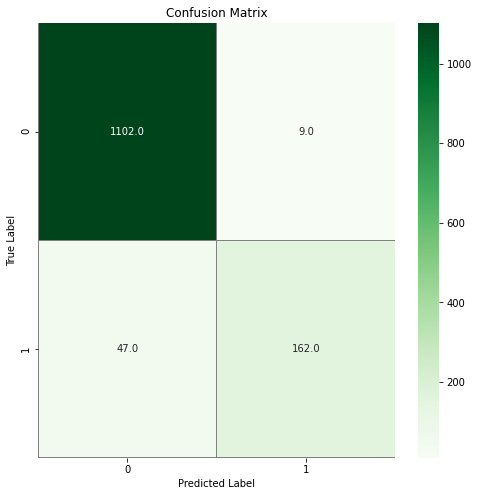

In [171]:

from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_final) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

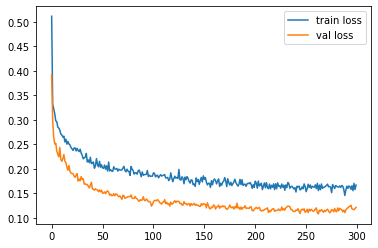

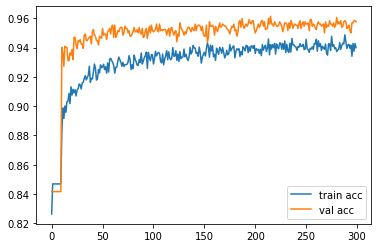

<Figure size 432x288 with 0 Axes>

In [177]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [183]:
from sklearn.metrics import f1_score , accuracy_score

In [182]:
f1_score(y_test, y_final)

0.8526315789473684

In [184]:
accuracy_score(y_test, y_final)

0.9575757575757575